In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization



# Step 1: Load and Preprocess the MNIST Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [5]:
train_images.shape

(48000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
val_images.shape

(12000, 28, 28)

# Normalise pixel values

In [8]:
train_images, test_images , val_images = train_images / 255.0, test_images / 255.0 , val_images / 255.0

# Reshape data

In [9]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
val_images = val_images.reshape(-1, 28, 28, 1)

In [10]:
train_images.shape

(48000, 28, 28, 1)

In [11]:
test_images.shape

(10000, 28, 28, 1)

In [12]:
val_images.shape

(12000, 28, 28, 1)

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))

In [14]:
train_dataset=train_dataset.shuffle(buffer_size=1024,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.shuffle(buffer_size=1024,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset=val_dataset.shuffle(buffer_size=1024,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

# Visulaisation

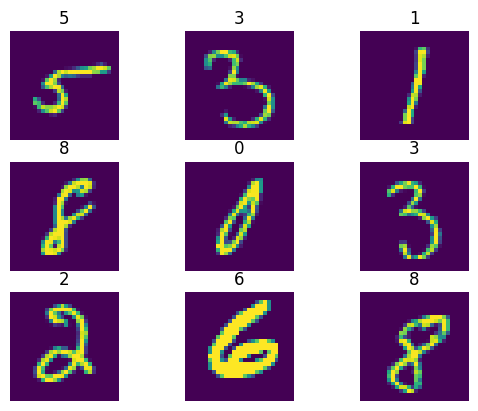

In [71]:
for images,labels in train_dataset.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().reshape(28,28))
    plt.title(labels[i].numpy())
    plt.axis("off")


# Step2: Define the CNN Model

In [15]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [18]:
from tensorflow.keras.utils import plot_model

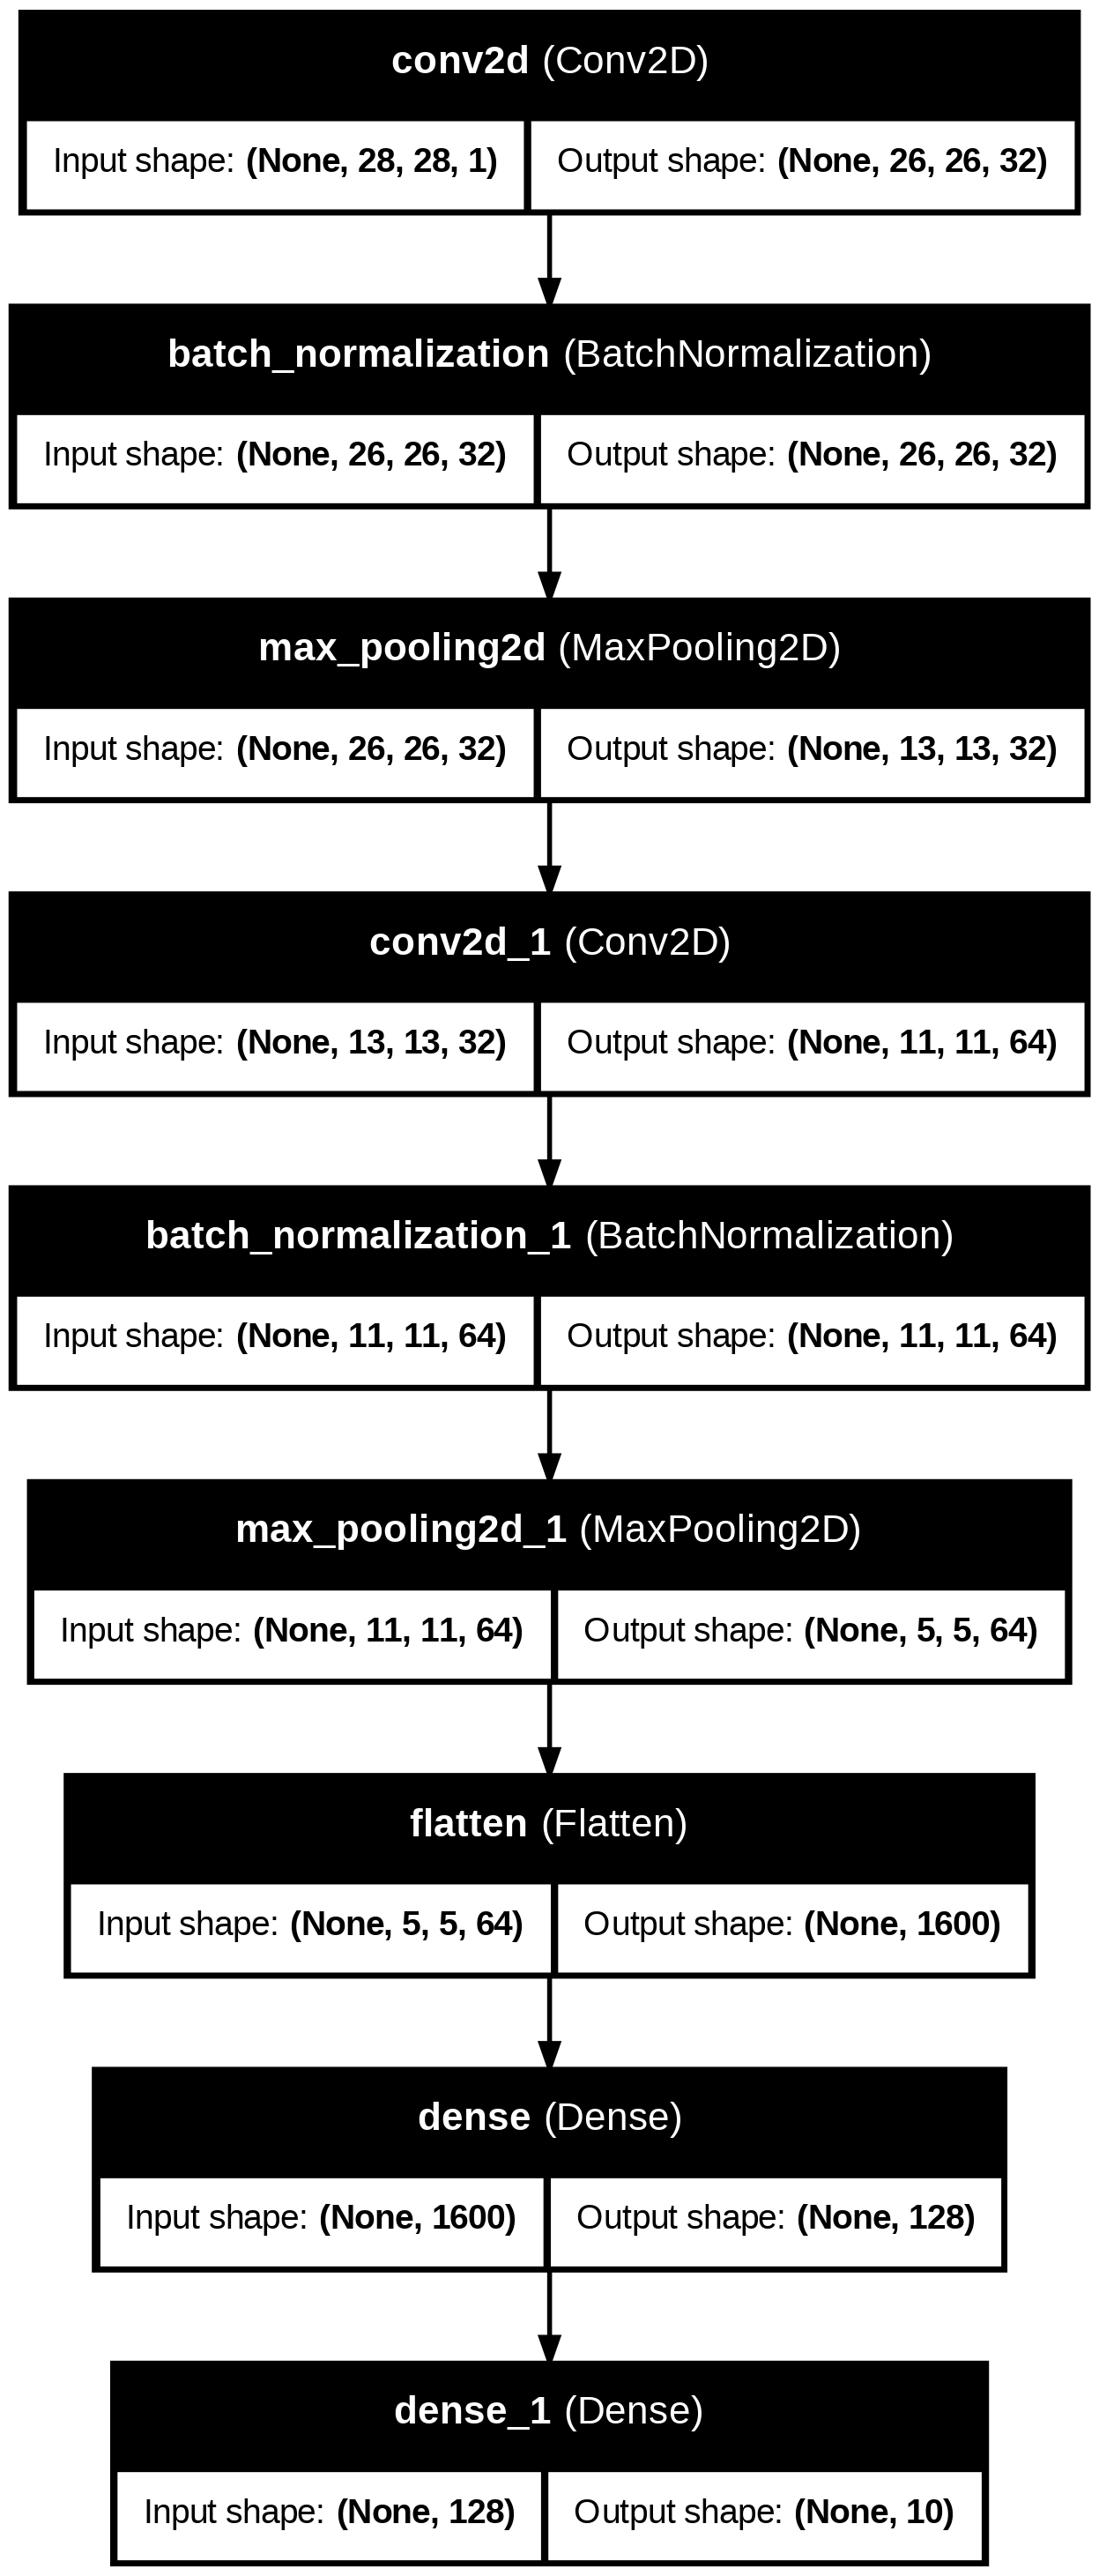

In [19]:
plot_model(model, to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [21]:
history=model.fit(train_dataset,epochs=10,validation_data=val_dataset,verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9941 - loss: 0.0194 - val_accuracy: 0.9882 - val_loss: 0.0625
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accuracy: 0.9883 - val_loss: 0.0624
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9943 - loss: 0.0195 - val_accuracy: 0.9901 - val_loss: 0.0554
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9958 - loss: 0.0148 - val_accuracy: 0.9881 - val_loss: 0.0688
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9967 - loss: 0.0113 - val_accuracy: 0.9845 - val_loss: 0.0848
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9973 - loss: 0.0094 - val_accuracy: 0.9900 - val_loss: 0.0636
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9972 - loss: 0.0086 - val_accuracy: 0.9886 - val_loss: 0.0704
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9977 - loss: 0.0069 -

In [22]:
model.evaluate(test_dataset)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9872 - loss: 0.0719


[0.06234262138605118, 0.9896000027656555]

#Step3:Testing

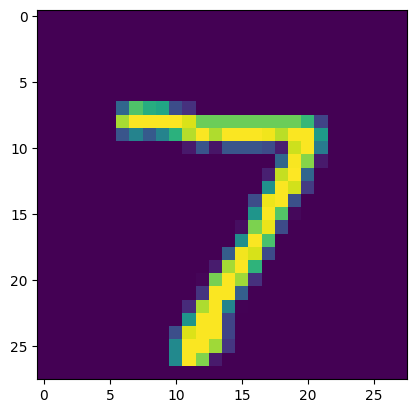

In [26]:
img=test_images[0]
plt.imshow(img)

In [27]:
img.shape

(28, 28, 1)

In [30]:
predicted=model.predict(img.reshape(-1,28,28,1))
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[1.9389311e-36, 7.8996241e-21, 4.2020768e-27, 8.0925159e-28,
        4.5031000e-27, 2.1825779e-29, 3.2229865e-44, 1.0000000e+00,
        4.3601766e-35, 3.2500677e-24]], dtype=float32)

In [32]:
np.argmax(predicted,axis=1)

array([7])

**Accuracy & Loss Plots**

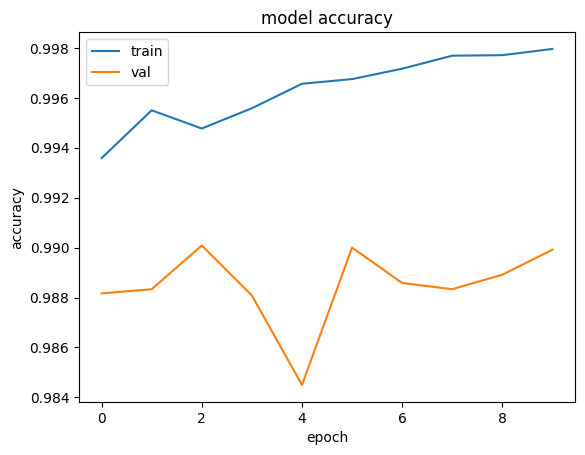

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

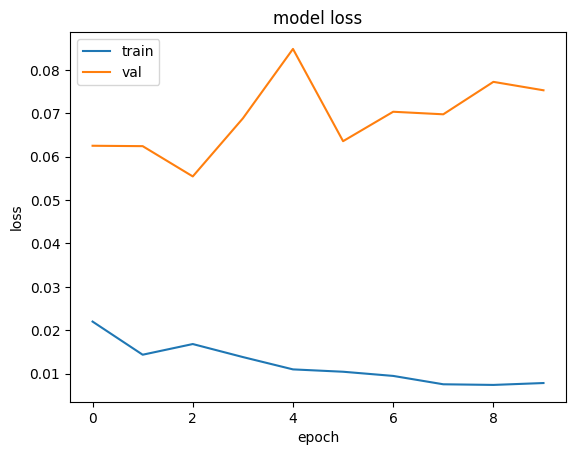

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

In [39]:
model.save("model.keras")

In [66]:
def prediction(model,image):
  if isinstance(image,np.ndarray):
    img=image.reshape(-1,28,28,1)
    predicted=model.predict(img)
    return np.argmax(predicted,axis=1)
  else:
     imaeg=np.array(image)
     img=image.reshape(-1,28,28,1)
     predicted=model.predict(img)
     return np.argmax(predicted,axis=1)

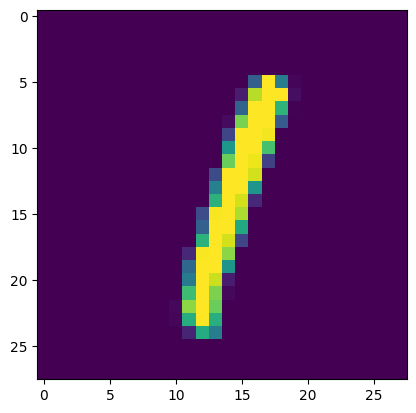

In [49]:
img1=test_images[5]
plt.imshow(img1)

In [67]:
prediction(model,img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([1])

# Summary of Findings:
The model was trained over 10 epochs, achieving a final training accuracy of 99.78% and a validation accuracy of 98.99%. The loss values indicate that the model has learned well, with a final training loss of 0.0072 and a validation loss of 0.0753. Throughout the training process, the model maintained high accuracy, and the validation accuracy remained stable with minimal fluctuations.

#Challenges Faced:

Overfitting: The increasing validation loss from Epoch 5 onwards suggests that the model might be memorizing the training data rather than generalizing well.

 # Improvements:
 Regularization: Implement techniques like Dropout, L2 Regularization to reduce overfitting.